In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap



In [3]:
models = ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo']
for model in models:
    globals()[f'{model}_nh'] = np.load(f'/user/home/al18709/work/ke_track_rain/hr/{model}_composite_nh.npy')
    globals()[f'{model}_sh'] = np.load(f'/user/home/al18709/work/ke_track_rain/hr/{model}_composite_sh.npy')
    meta = pd.read_csv(f'/user/home/al18709/work/ke_track_inputs/{model}_hist_tracks.csv')
    meta_filtered = meta[meta.year >= 2000].reset_index()
    globals()[f'{model}_nstorms_sh'] = len(meta_filtered[meta_filtered.lat < 0].sid.drop_duplicates())
    globals()[f'{model}_nstorms_nh'] = len(meta_filtered[meta_filtered.lat > 0].sid.drop_duplicates())


In [34]:
nh = np.concatenate([np.expand_dims(globals()[f'{model}_nh'],axis=0) for model in models])
sh = np.concatenate([np.expand_dims(globals()[f'{model}_sh'],axis=0) for model in models])
nstorms_nh = np.sum([globals()[f'{model}_nstorms_nh'] for model in models])
nstorms_sh = np.sum([globals()[f'{model}_nstorms_sh'] for model in models])
nstorms = nstorms_nh + nstorms_sh

In [35]:
print(nstorms_nh)
print(nstorms_sh)

4584
3711


In [36]:
mean_nh = np.mean(nh,axis=0)
mean_sh = np.mean(sh,axis=0)

mean = (nstorms_nh/nstorms)*mean_nh + (nstorms_sh/nstorms)*mean_sh

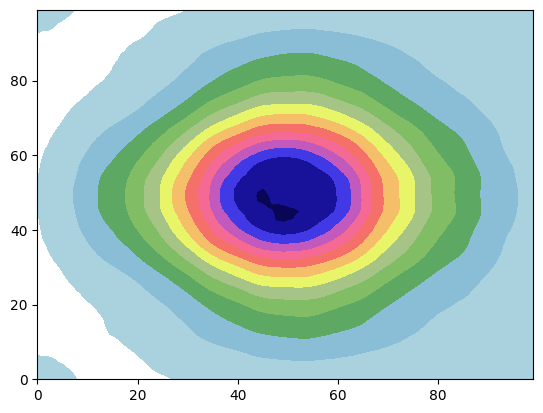

In [37]:
plt.contourf(mean,cmap=precip_cmap,levels=levels)

In [10]:
# define cmap
precip_cmap,precip_norm = make_cmap()

In [12]:
reshaped_list = np.array(models).repeat(2).reshape(4, 4)
print(reshaped_list.shape)

(4, 4)


canesm
CANESM (NH)
canesm
CANESM (SH)
cnrm6
CNRM6 (NH)
cnrm6
CNRM6 (SH)
ecearth6
ECEARTH6 (NH)
ecearth6
ECEARTH6 (SH)
ipsl6
IPSL6 (NH)
ipsl6
IPSL6 (SH)
miroc6
MIROC6 (NH)
miroc6
MIROC6 (SH)
mpi6
MPI6 (NH)
mpi6
MPI6 (SH)
mri6
MRI6 (NH)
mri6
MRI6 (SH)
ukmo
UKMO (NH)
ukmo
UKMO (SH)


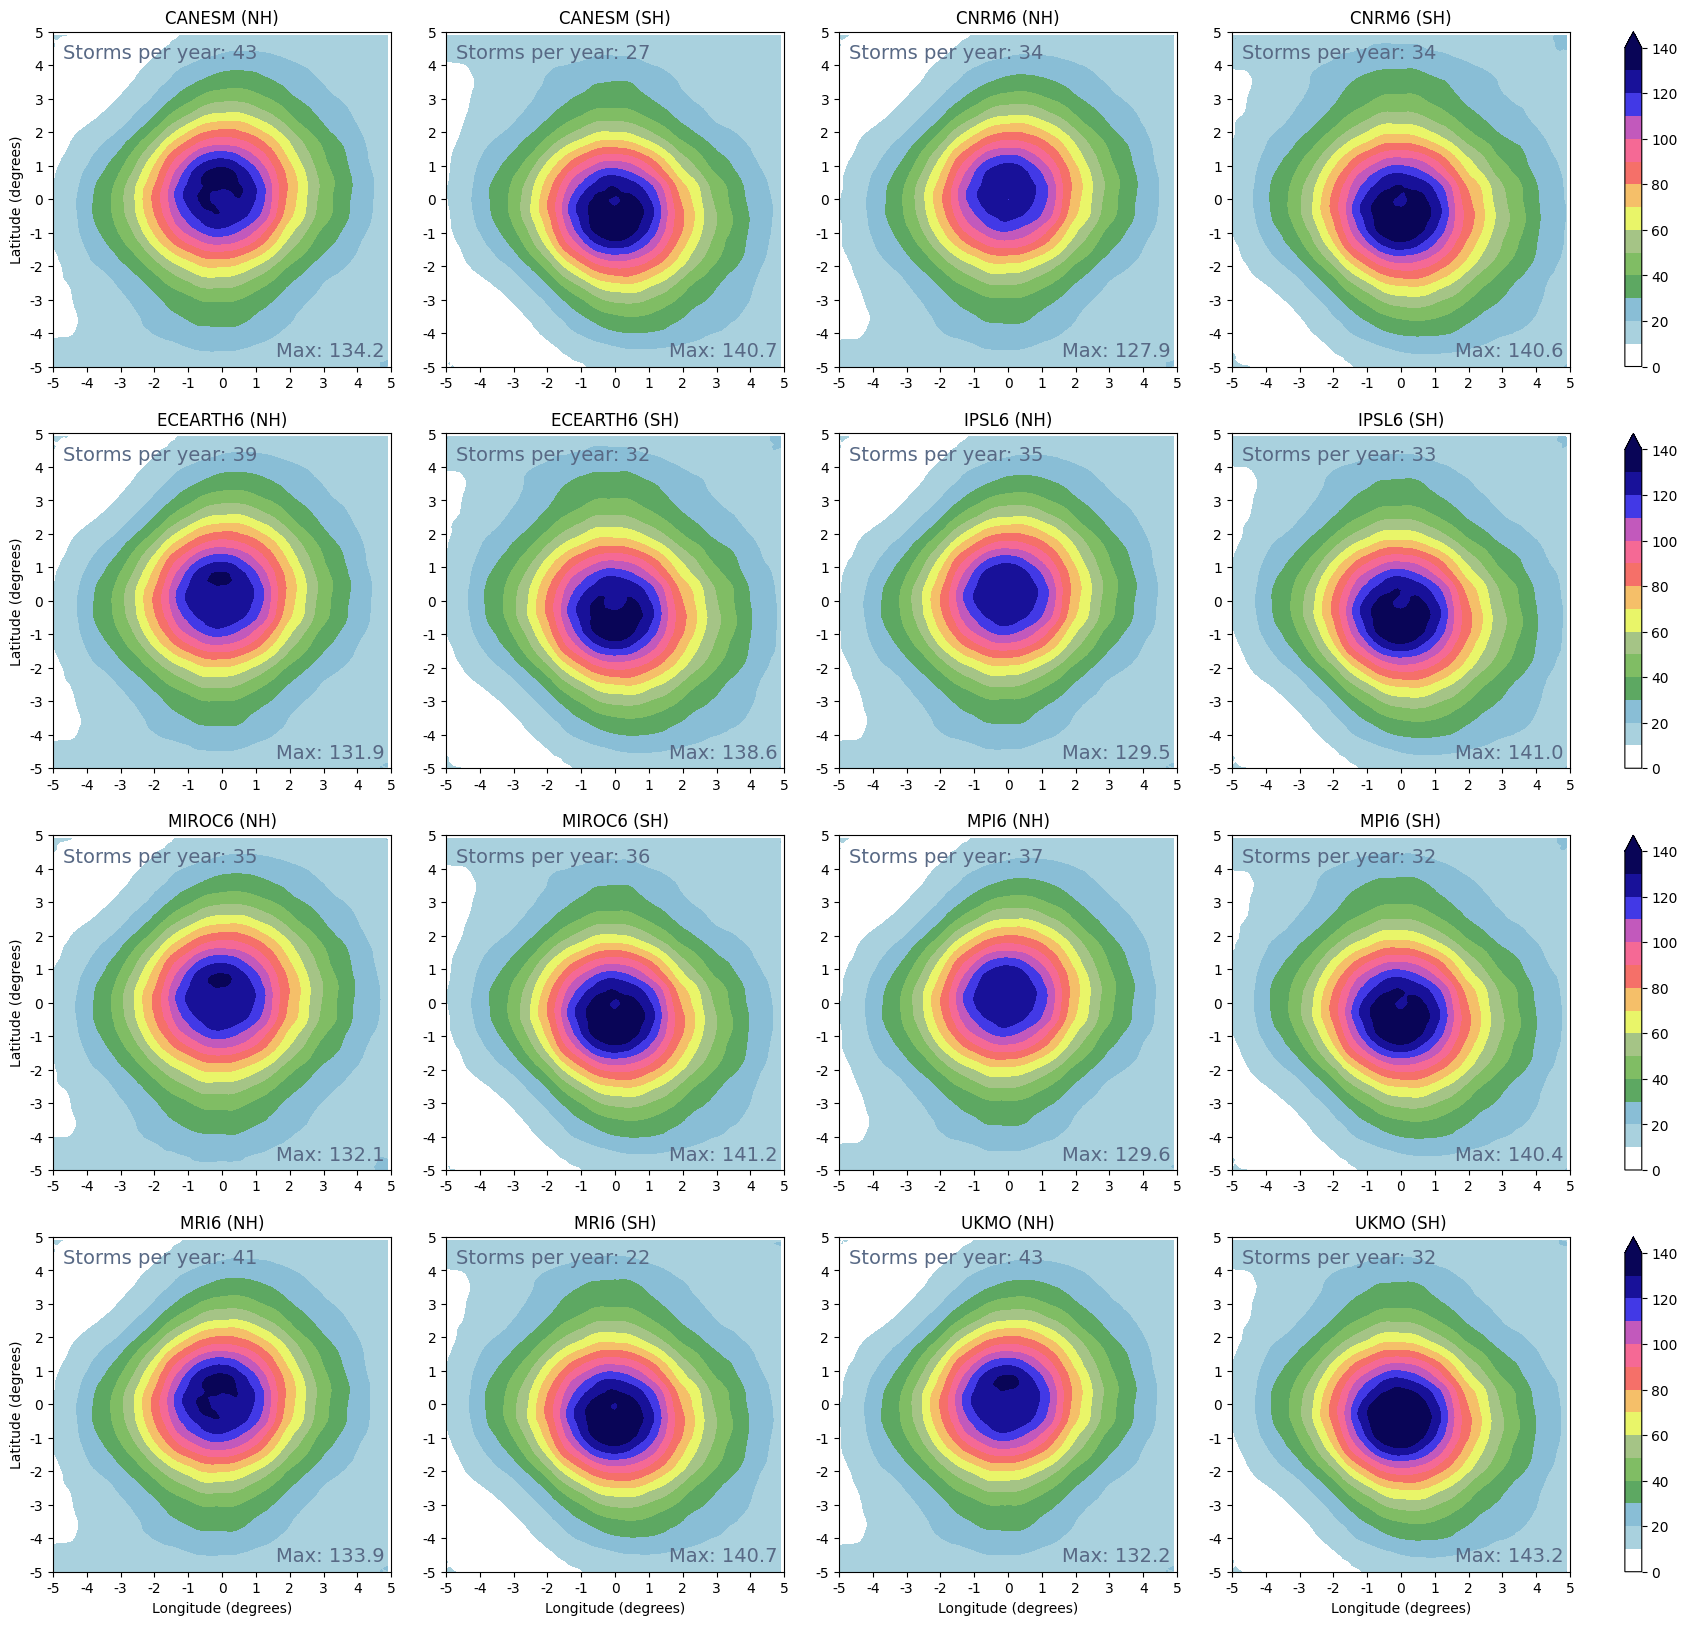

In [16]:

fig,axes = plt.subplots(4,5,figsize=(20.5, 20),gridspec_kw={'width_ratios': [1, 1, 1, 1, 0.05]})

levels = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
# levels = [0,10,20,30,40,50,60,top_x,80,90,100,110,120,130,140,160,180,200,220,240]

top_x = 66
nyears = 15
# models = models
titles = ['CANESM (NH)', 'CANESM (SH)', 'CNRM6 (NH)', 'CNRM6 (SH)', 'ECEARTH6 (NH)', 'ECEARTH6 (SH)', 'IPSL6 (NH)', 'IPSL6 (SH)', 'MIROC6 (NH)', 'MIROC6 (SH)', 'MPI6 (NH)', 'MPI6 (SH)', 'MRI6 (NH)', 'MRI6 (SH)', 'UKMO (NH)', 'UKMO (SH)']
reshaped_titles = np.array(titles).reshape(4, 4)

for row in range(4):
	for col in range(5):
		if col == 4:
			continue
		if col in [1,3]:
			h = 'sh'
		else:
			h = 'nh'
		model = reshaped_list[row,col]
		print(model)
		title = reshaped_titles[row,col]
		print(title)
		ax = axes[row,col]
		im = ax.contourf(globals()[f'{model}_{h}'],cmap=precip_cmap,levels=levels,extend='max')
		ax.annotate('Max: %.1f' % np.max(globals()[f'{model}_{h}']), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
		ax.annotate('Storms per year: %.0f' % (globals()[f'{model}_nstorms_{h}'] / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
		ax.set_title(title)



# im = axes[0,0].contourf(composite_CMCC_ssp585_NH,cmap=precip_cmap,levels=levels,extend='max')
# axes[0,0].annotate('Max: %.1f' % np.max(composite_CMCC_ssp585_NH), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[0,0].annotate('Storms per year: %.0f' % (int(nstorms_CMCC_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[0,1].contourf(composite_CMCC_ssp585_SH,cmap=precip_cmap,levels=levels,extend='max')
# axes[0,1].annotate('Max: %.1f' % np.max(composite_CMCC_ssp585_SH), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[0,1].annotate('Storms per year: %.0f' % (int(nstorms_CMCC_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[0,2].contourf(composite_hadgem_ssp585_NH,cmap=precip_cmap,levels=levels,extend='max')
# axes[0,2].annotate('Max: %.1f' % np.max(composite_hadgem_ssp585_NH), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[0,2].annotate('Storms per year: %.0f' % (int(nstorms_hadgem_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[0,3].contourf(composite_hadgem_ssp585_SH,cmap=precip_cmap,levels=levels,extend='max')
# axes[0,3].annotate('Max: %.1f' % np.max(composite_hadgem_ssp585_SH), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[0,3].annotate('Storms per year: %.0f' % (int(nstorms_hadgem_ssp585_sh)  / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# CMIP6 ssp585
# nyears = 30
# axes[1,0].contourf(composite_miroc6_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[1,0].annotate('Max: %.1f' % np.max(composite_miroc6_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[1,0].annotate('Storms per year: %.0f' % (int(nstorms_miroc6_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[1,1].contourf(composite_miroc6_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[1,1].annotate('Max: %.1f' % np.max(composite_miroc6_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[1,1].annotate('Storms per year: %.0f' % (int(nstorms_miroc6_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[1,2].contourf(composite_mpi_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[1,2].annotate('Max: %.1f' % np.max(composite_mpi_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[1,2].annotate('Storms per year: %.0f' % (int(nstorms_mpi_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[1,3].contourf(composite_mpi_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[1,3].annotate('Max: %.1f' % np.max(composite_mpi_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[1,3].annotate('Storms per year: %.0f' % (int(nstorms_mpi_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[2,0].contourf(composite_noresm_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[2,0].annotate('Max: %.1f' % np.max(composite_noresm_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[2,0].annotate('Storms per year: %.0f' % (int(nstorms_noresm_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[2,1].contourf(composite_noresm_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[2,1].annotate('Max: %.1f' % np.max(composite_noresm_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[2,1].annotate('Storms per year: %.0f' % (int(nstorms_noresm_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[2,2].contourf(composite_nems_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[2,2].annotate('Max: %.1f' % np.max(composite_nems_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[2,2].annotate('Storms per year: %.0f' % (int(nstorms_nems_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[2,3].contourf(composite_nems_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[2,3].annotate('Max: %.1f' % np.max(composite_nems_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[2,3].annotate('Storms per year: %.0f' % (int(nstorms_nems_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[3,0].contourf(composite_ipsl_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[3,0].annotate('Max: %.1f' % np.max(composite_ipsl_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[3,0].annotate('Storms per year: %.0f' % (int(nstorms_ipsl_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[3,1].contourf(composite_ipsl_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[3,1].annotate('Max: %.1f' % np.max(composite_ipsl_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[3,1].annotate('Storms per year: %.0f' % (int(nstorms_ipsl_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[3,2].contourf(composite_mri_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[3,2].annotate('Max: %.1f' % np.max(composite_mri_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[3,2].annotate('Storms per year: %.0f' % (int(nstorms_mri_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[3,3].contourf(composite_mri_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[3,3].annotate('Max: %.1f' % np.max(composite_mri_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[3,3].annotate('Storms per year: %.0f' % (int(nstorms_mri_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[4,0].contourf(composite_ecearth_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[4,0].annotate('Max: %.1f' % np.max(composite_ecearth_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[4,0].annotate('Storms per year: %.0f' % (int(nstorms_ecearth_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[4,1].contourf(composite_ecearth_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[4,1].annotate('Max: %.1f' % np.max(composite_ecearth_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[4,1].annotate('Storms per year: %.0f' % (int(nstorms_ecearth_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# axes[4,2].contourf(composite_cmcclr_ssp585_nh,cmap=precip_cmap,levels=levels,extend='max')
# axes[4,2].annotate('Max: %.1f' % np.max(composite_cmcclr_ssp585_nh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[4,2].annotate('Storms per year: %.0f' % (int(nstorms_cmcclr_ssp585_nh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')
# axes[4,3].contourf(composite_cmcclr_ssp585_sh,cmap=precip_cmap,levels=levels,extend='max')
# axes[4,3].annotate('Max: %.1f' % np.max(composite_cmcclr_ssp585_sh), xy = (90,90), xytext=(top_x,3),fontsize=14, color='#586985')
# axes[4,3].annotate('Storms per year: %.0f' % (int(nstorms_cmcclr_ssp585_sh) / nyears), xy = (90,90), xytext=(3,92),fontsize=14, color='#586985')

# Set the tick positions
t_p = [0,10,20,30,40,50,60,70,80,90,100]
t_l = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
for i in range(4):
	for j in range(4):
		axes[i,j].set_xticks(t_p)
		axes[i,j].set_yticks(t_p)
		# Set the tick labels
		axes[i,j].set_xticklabels(t_l)
		axes[i,j].set_yticklabels(t_l)

for ax in [axes[0,0],axes[1,0],axes[2,0],axes[3,0]]:
	ax.set_ylabel('Latitude (degrees)')
for ax in [axes[3,0],axes[3,1],axes[3,2],axes[3,3]]:
	ax.set_xlabel('Longitude (degrees)')

# axes[0,0].set_xlabel('Longitude (degrees)')
# axes[0,0].set_ylabel('Latitude (degrees)')

# axes[0,0].set_title('HighResMIP CMCC ssp585 (NH)')
# axes[0,1].set_title('HighResMIP CMCC ssp585 (SH)')
# axes[0,3].set_title('HighResMIP EC-Earth3P-HR ssp585 (SH)')
# axes[0,2].set_title('HighResMIP HadGEM3-GC31-HM ssp585 (NH)')

# axes[1,0].set_title('CMIP6 MIROC6 ssp585 (NH)')
# axes[1,1].set_title('CMIP6 MIROC6 ssp585 (SH)')
# axes[1,2].set_title('CMIP6 MPI-ESM1-2-LR (NH)')
# axes[1,3].set_title('CMIP6 MPI-ESM1-2-LR (SH)')

# axes[2,0].set_title('CMIP6 NORESM ssp585 (NH)')
# axes[2,1].set_title('CMIP6 NORESM ssp585 (SH)')
# axes[2,2].set_title('CMIP6 NESM3 (NH)')
# axes[2,3].set_title('CMIP6 NESM3 (SH)')

# axes[3,0].set_title('CMIP6 IPSL-CM6A-LR (NH)')
# axes[3,1].set_title('CMIP6 IPSL-CM6A-LR (SH)')
# axes[3,2].set_title('CMIP6 MRI-ESM2-0 (NH)')
# axes[3,3].set_title('CMIP6 MRI-ESM2-0 (SH)')

# axes[4,0].set_title('CMIP6 EC-Earth3 (NH)')
# axes[4,1].set_title('CMIP6 EC-Earth3 (SH)')
# axes[4,2].set_title('CMIP6 CMCC-ESM2 (NH)')
# axes[4,3].set_title('CMIP6 CMCC-ESM2 (SH)')

# axes[7,0].set_title('CMIP6 BCC-CSM2-MR (NH)')
# axes[7,1].set_title('CMIP6 BCC-CSM2-MR (SH)')

plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[0,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[1,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[2,4])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[3,4])
# plt.colorbar(im,ticks=[0,20,40,60,80,100,120,140],cax=axes[4,4])


plt.savefig('composite_rain_chirps_hist.png',bbox_inches='tight')

In [12]:
# method for composite rain plot:
# for each storm, sum up the rain along its track, centred on centre of TC.
# convert units from mm/3hr rainfall to mm/day rainfall. THis requires knowing if the storm timesteps are sampled every 3 hours or every 6 hours
# for 3 hourly storms you add up and divide by number of timesteps (storm duration/number of hours storm was alive for as a TC) to get mm/hr then multiply by 24
# for 6 hourly storms you add up rain at 6 hour points and interpolate to get values for 3 hourly points (otherwise you're only adding up half the rainfall). Then divide by number of timesteps and multiply by 24
# split into nh and sh
# do the mean for each hemisphere


# save everything
fig_dir = '/user/home/al18709/work/figures/figure_1/'



# HighresMIP
np.save(fig_dir + 'composite_CMCC_ssp585_NH.npy',composite_CMCC_ssp585_NH)
np.save(fig_dir + 'composite_CMCC_ssp585_SH.npy',composite_CMCC_ssp585_SH)

np.save(fig_dir + 'composite_ecearthhr_ssp585_NH.npy',composite_ecearthhr_ssp585_NH)
np.save(fig_dir + 'composite_ecearthhr_ssp585_SH.npy',composite_ecearthhr_ssp585_SH)

np.save(fig_dir + 'composite_hadgem_ssp585_NH.npy',composite_hadgem_ssp585_NH)
np.save(fig_dir + 'composite_hadgem_ssp585_SH.npy',composite_hadgem_ssp585_SH)

# CMIP6 ssp585
np.save(fig_dir + 'composite_miroc6_ssp585_nh.npy',composite_miroc6_ssp585_nh)
np.save(fig_dir + 'composite_miroc6_ssp585_sh.npy',composite_miroc6_ssp585_sh)

np.save(fig_dir + 'composite_mpi_ssp585_nh.npy',composite_mpi_ssp585_nh)
np.save(fig_dir + 'composite_mpi_ssp585_sh.npy',composite_mpi_ssp585_sh)

np.save(fig_dir + 'composite_noresm_ssp585_nh.npy',composite_noresm_ssp585_nh)
np.save(fig_dir + 'composite_noresm_ssp585_sh.npy',composite_noresm_ssp585_sh)

# np.save(fig_dir + composite_taiesm_ssp585_nh,'composite_taiesm_ssp585_nh.npy')
# np.save(fig_dir + composite_taiesm_ssp585_sh,'composite_taiesm_ssp585_sh.npy')

np.save(fig_dir + 'composite_ipsl_ssp585_nh.npy',composite_ipsl_ssp585_nh)
np.save(fig_dir + 'composite_ipsl_ssp585_sh.npy',composite_ipsl_ssp585_sh)

np.save(fig_dir + 'composite_mri_ssp585_nh.npy',composite_mri_ssp585_nh)
np.save(fig_dir + 'composite_mri_ssp585_sh.npy',composite_mri_ssp585_sh)

np.save(fig_dir + 'composite_ecearth_ssp585_nh.npy',composite_ecearth_ssp585_nh)
np.save(fig_dir + 'composite_ecearth_ssp585_sh.npy',composite_ecearth_ssp585_sh)

np.save(fig_dir + 'composite_cmcclr_ssp585_nh.npy',composite_cmcclr_ssp585_nh)
np.save(fig_dir + 'composite_cmcclr_ssp585_sh.npy',composite_cmcclr_ssp585_sh)

# np.save(fig_dir + composite_bcc_ssp585_nh,'composite_bcc_ssp585_nh.npy')
# np.save(fig_dir + composite_bcc_ssp585_sh,'composite_bcc_ssp585_sh.npy')

np.save(fig_dir + 'composite_nems_ssp585_nh.npy',composite_nems_ssp585_nh)
np.save(fig_dir + 'composite_nems_ssp585_sh.npy',composite_nems_ssp585_sh)


# OG WGAN
# np.save(composite_og_nh,'composite_og_nh.npy')
# np.save(composite_og_sh,'composite_og_sh.npy')
# np.save(composite_og_x_nh,'composite_og_x_nh.npy')
# np.save(composite_og_x_nh,'composite_og_x_nh.npy')
# np.save(composite_og_x_sh,'composite_og_x_sh.npy')

# # Scalar WGAN
# np.save(composite_wgan_nh,'composite_wgan_nh.npy')
# np.save(composite_wgan_sh,'composite_wgan_sh.npy')
